In [1]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.8 MB/s eta 0:00:00


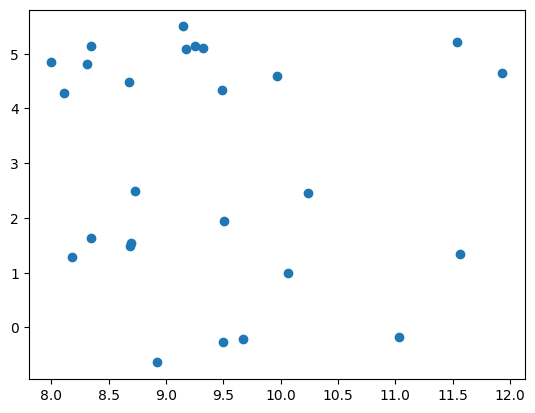

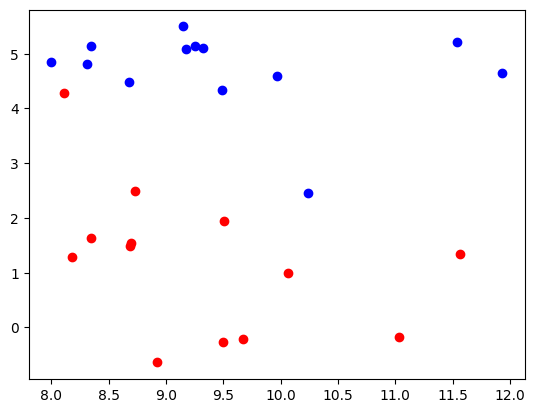

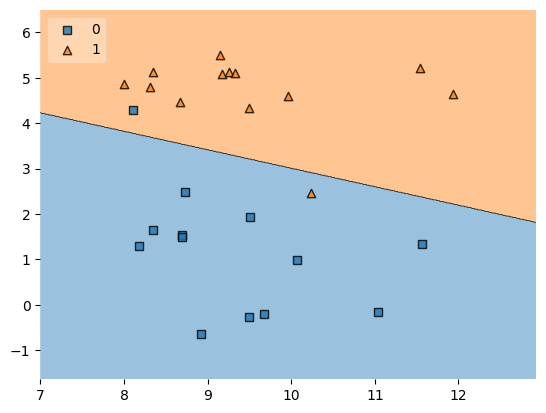

In [7]:
# SVM(Support Vector Machine)
# sklearn으로 구현

import numpy as np
from sklearn.svm import SVC
import mglearn # Dataset을 가져오기 위해서 사용
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
#Decision Boundary를 그리기 위해 mlxtend 모듈을 이용

x_data, t_data =mglearn.datasets.make_forge()
# print(x_data)
# print(t_data)
# 모든 점을 2차원평면에 그려보아요
plt.scatter(x_data[:,0],x_data[:,1])
plt.show()

# t_data가 0인 경우 red로 표현
# t_data가 1인 경우 blue로 표현

x_data_red = x_data[t_data ==0]
x_data_blue = x_data[t_data==1]

plt.scatter(x_data_red[:,0], x_data_red[:,1], color='red')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='blue')
plt.show()

# SVM을 구현해 보아요!
model = SVC(kernel='linear')
model.fit(x_data, t_data)

plot_decision_regions(X=x_data,
                      y=t_data,
                      clf=model,
                      legend=2)

plt.show()

In [8]:
# Iris 예제를 다양한 머신러닝 방법으로 구현할꺼예요!
# 첫번째는 우리에게 익숙한 Regression으로 구현해 보아요!
# Tensorflow Keras로 구현해 보아요!

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Raw Data Loading
iris = datasets.load_iris()
# print(type(iris))   # <class 'sklearn.utils._bunch.Bunch'>
# print(iris.keys())
# print(iris['DESCR'])
# print(iris['feature_names'])

# DataFrame으로 변환해요!
df = pd.DataFrame(iris['data'],
                  columns=iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris['target']
# display(df)
# display(df.info())
# Data Preprocessing

x_data = df.drop('target', axis=1, inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# train, test 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3)
# Model 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Flatten(input_shape=(4,)))

model.add(Dense(units=3,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',
                   patience=6)

history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=500,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[es])

print(model.evaluate(x_data_test_norm, t_data_test))
# [0.18582358956336975, 0.9555555582046509]

Epoch 1/500
3/3 [==============================] - 1s 103ms/step - loss: 1.1582 - accuracy: 0.3333 - val_loss: 0.9791 - val_accuracy: 0.5238
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 0.9687 - accuracy: 0.4762 - val_loss: 0.8882 - val_accuracy: 0.6667
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 0.8280 - accuracy: 0.7857 - val_loss: 0.7512 - val_accuracy: 0.7619
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7080 - accuracy: 0.7976 - val_loss: 0.6662 - val_accuracy: 0.7619
Epoch 5/500
3/3 [==============================] - 0s 16ms/step - loss: 0.6260 - accuracy: 0.7619 - val_loss: 0.6166 - val_accuracy: 0.6667
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 0.5634 - accuracy: 0.8333 - val_loss: 0.5800 - val_accuracy: 0.7619
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 0.5199 - accuracy: 0.8810 - val_loss: 0.5560 - val_accuracy: 0.8095
Epoch 8/500
3/3 [==

In [13]:
# 같은 예제를 이번에는 Support Vector Machine으로 구현해 보아요!
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Raw Data Loading
iris = datasets.load_iris()

# DataFrame으로 변환해요!
df = pd.DataFrame(iris['data'],
                  columns=iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris['target']


# Data Preprocessing
x_data = df.drop('target', axis=1, inplace=False).values
t_data = df['target'].values

# train, test 데이터 분리
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(x_data,
                 t_data,
                 test_size=0.3)

# Model 구현
svm_model = SVC(C=1)
svm_model.fit(x_data_train, t_data_train)

# 정확도 구현
print(accuracy_score(t_data_test,svm_model.predict(x_data_test))) #output 0.9777777777777777

0.9333333333333333


In [ ]:
#여기까지 정리
# 이렇게 sklearn으로 모델을 만들때
# 다양한 hyperparameter를 이용해서 모델을 만듦
# 그런데 이런 hyperparameter를 결정하기 위해서 우리가 수동으로 이 값을 변경하고 실행하는 작업을 반복
# 이 작업을 자동화 할 수 있나요?
# GridSearchCV라는 걸 이용하면 자동으로 최적의 hyperparameter를 찾을 수 있음
